In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Image Processing with Neural Network
## Template 01

## Template with helper functions

- Moons Dataset
- Decision Boundary
- Loss curve

<img src='../../../images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align = "left"/>

## Import Statements

In [4]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
 
# from utils.helper import fn_plot_decision_boundary # this function is from helper.py

In [5]:
# print (fn_plot_decision_boundary.__doc__)

## Setup Global Parameters

In [7]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 20000  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [8]:
def fn_plot_decision_boundary(predict, X, y):
    
    # initialize the figure
    fig, ax = plt.subplots(figsize = (8,5));
    
    # Small increment to create object function surface
    dm = 0.01
    
    # Range of X values (First feature)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    
    # Range of Y values (Second feature)
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create a grid to evaluate the object function
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # flatten and stack
    # arrays will be stacked along their last axis after being upgraded to at least 2-D 
    # with 1’s post-pended to the shape (column vectors made out of 1-D arrays)
    XX = np.c_[xx.ravel(), yy.ravel()]

    # list to collect predictions
    Z = predict(XX)

    Z = Z.reshape(xx.shape)

    # add another column filled with 1 to make it work with the predict function
    XX = np.hstack( ( XX, np.ones((XX.shape[0],1)) ) )
    
    # list to collect predictions
    y_pred = []
    
    # Iterate over rows
    # for row in (XX):

    #     # a = predict(row, wts) # this is a float between [0, 1]

    #     y_p = predict(row, wts)
    #     pred = 0
    #     if y_p>0.5:
    #         pred=1
    #     y_pred.append(pred)
        
    # Z = np.array(y_pred).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k', cmap=plt.cm.bwr)
    ax.set_title('Decision Boundary')

    ax.set_xlabel('A')
    ax.set_ylabel('B')
    plt.show()

## Generate Data Set
<div style="font-family: Arial; font-size:1.2em;color:red;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [10]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, noise=NOISE, shuffle=True, random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

## Visualization
<p style="font-family: Arial; font-size:1.2em;color:red;">
DataFrames are easier to visualize
</p>

In [12]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [14]:
data_df.describe()

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


<Axes: xlabel='target'>

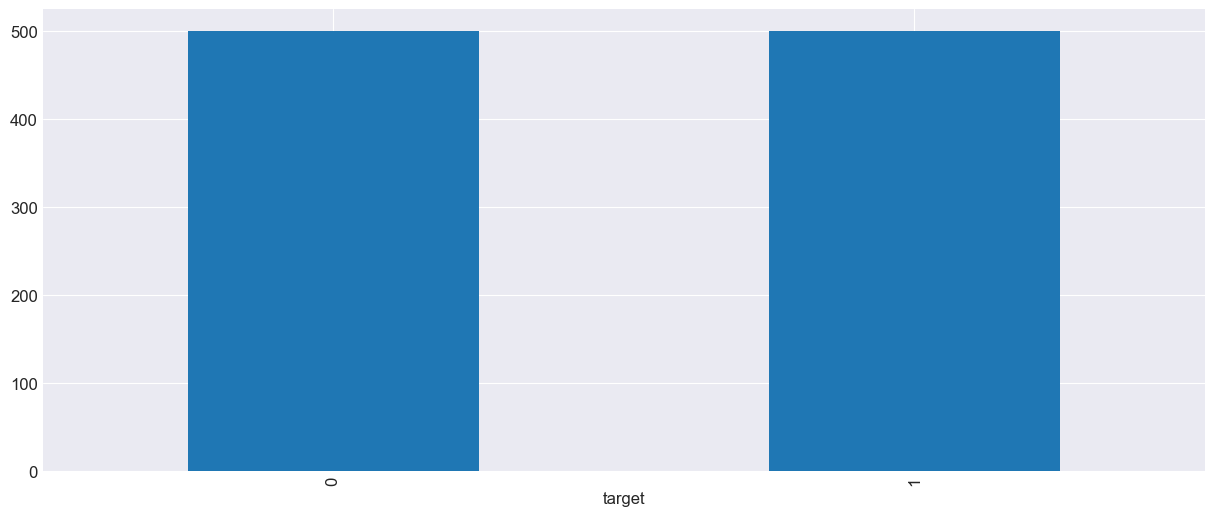

In [15]:
data_df['target'].value_counts().plot(kind='bar')

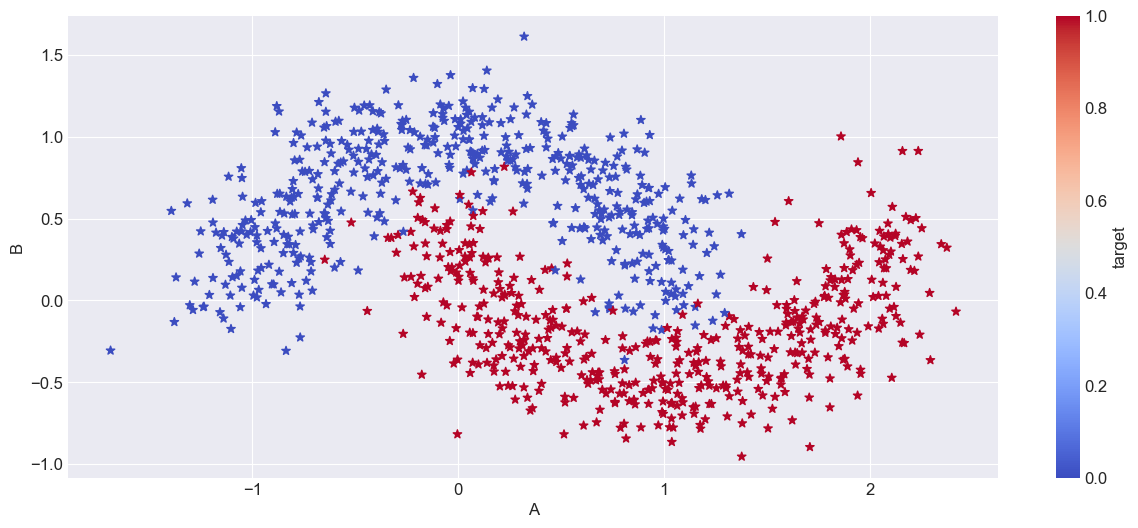

In [16]:
# Plot the data
data_df.plot.scatter('A', 'B',      # columns to plot
                     s = 40,        # size of the marker
                     marker = '*',  # type of marker
                     c = 'target',  # color as per target column
                     cmap=CMAP);    # using colormap

In [17]:
# cobvert to one hot encoding

In [18]:
y.shape

(1000,)

In [19]:
y = pd.get_dummies(y).to_numpy()
y.shape

(1000, 2)

In [20]:

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,stratify=y,random_state=RANDOM_STATE )

X_train.shape, X_test.shape,y_train.shape, y_test.shape

((800, 2), (200, 2), (800, 2), (200, 2))

#### ONE HIDDEN LAYER
# Activation function
# softmax

In [23]:
def fn_softmax(z):
    exp_sc = np.exp(z - np.max(z)) # max subtracted to avoid overflow
    return exp_sc/np.sum(exp_sc,axis=1,keepdims= True)

In [24]:
# unit testing
fn_softmax(np.array([[-1., 0., 1.0],[-10, 0, 10]]))#.sum(axis = 1)

array([[9.00305732e-02, 2.44728471e-01, 6.65240956e-01],
       [2.06106005e-09, 4.53978686e-05, 9.99954600e-01]])

### TanH Activation

In [26]:
def fn_actv(z):
    return np.tanh(z)

def fn_actv_prime(a):
    return 1.0 - np.tanh(a)**2

In [27]:
fn_actv(np.array([[-1., 0., 1.0],[-np.inf, 0, np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

In [28]:
np.tanh(0.5)

0.46211715726000974

In [29]:
1-np.tanh(-1)**2

0.41997434161402614

In [30]:
def predict(model, X_p):

    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    W3, b3, W4, b4 = model['W3'], model['b3'], model['W4'], model['b4']
    W5, b5= model['W5'], model['b5']
    

   
    ### forward propagation
    # layer 1,
    z1 = X_p.dot(W1) + b1  #Aggregation function
    a1 = fn_actv(z1) # Activations
    # layer 2
    z2 = a1.dot(W2) + b2 # Aggregation function
    a2 = fn_actv(z2) # Activations

    # layer 3,
    z3 = a2.dot(W3) + b3 # Aggregation function
    a3 = fn_actv(z3) # Activations
    
    # layer 4,
    z4 = a3.dot(W4) + b4 # Aggregation function
    a4 = fn_actv(z4)     # Activations
    
    # layer 5,
    z5 = a4.dot(W5) + b5 # Aggregation function
    a5 = fn_softmax(z5)    # Activations

    
    return np.argmax(a5, axis =1) # will return true/false 

In [31]:
def calculate_loss(model, X_l, y_l):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    W3, b3, W4, b4 = model['W3'], model['b3'], model['W4'], model['b4']
    W5, b5= model['W5'], model['b5']
    

    m = X_l.shape[0]
    ### forward propagation
    # layer 1,
    z1 = X_l.dot(W1) + b1  #Aggregation function
    a1 = fn_actv(z1) # Activations
    # layer 2
    z2 = a1.dot(W2) + b2 # Aggregation function
    a2 = fn_actv(z2) # Activations

    # layer 3,
    z3 = a2.dot(W3) + b3 # Aggregation function
    a3 = fn_actv(z3) # Activations
    
    # layer 4,
    z4 = a3.dot(W4) + b4 # Aggregation function
    a4 = fn_actv(z4)     # Activations
    
    # layer 5,
    z5 = a4.dot(W5) + b5 # Aggregation function
    a5 = fn_softmax(z5)    # Activations

    data_loss = -(y_l*np.log(a5)).sum()
    return data_loss/m

In [32]:
def build_model(param:dict,
                X_t: np.ndarray,
                y_t: np.ndarray,
                alpha: np.float64=ALPHA,
                epochs: np.int64=EPOCHS):
    """
    Args:
        nn_hdim: dict: number of nodes in hidden layers
        X_t: np.array: train features
        y_t: np.array: train labels
        alpha: float: learning rate
        epochs: int: number of epochs to train
    Return:
        model: dict
    """
    m= X_t.shape[0]
   
    # Defining 
    W1= np.random.rand(param['nn_dim'][0], param['nn_dim'][1])/ np.sqrt(param['nn_dim'][0])
    W2= np.random.rand(param['nn_dim'][1], param['nn_dim'][2])/ np.sqrt(param['nn_dim'][1])
    W3= np.random.rand(param['nn_dim'][2], param['nn_dim'][3])/ np.sqrt(param['nn_dim'][2])
    W4= np.random.rand(param['nn_dim'][3], param['nn_dim'][4])/ np.sqrt(param['nn_dim'][3])
    W5= np.random.rand(param['nn_dim'][4], param['nn_dim'][5])/ np.sqrt(param['nn_dim'][4])

    b1 = np.zeros((1,param['nn_dim'][1]))
    b2 = np.zeros((1,param['nn_dim'][2]))
    b3 = np.zeros((1,param['nn_dim'][3]))
    b4 = np.zeros((1,param['nn_dim'][4]))
    b5 = np.zeros((1,param['nn_dim'][5]))
    

    model = {'W1':W1,
            'b1':b1,
            'W2':W2,
            'b2':b2}

    curr_loss = 0
    loss = []
    epoch = []

    for i in range(epochs):
        ### forward propagation
        # layer 1,
        z1 = X_t.dot(W1) + b1  #Aggregation function
        a1 = fn_actv(z1) # Activations
    
        z2 = a1.dot(W2) + b2 # layer 2, Aggregation function
        a2 = fn_actv(z2) # Activations


        z3 = a2.dot(W3) + b3 # layer 3, Aggregation function
        a3 = fn_actv(z3) # Activations

        z4 = a3.dot(W4) + b4 # layer 4, Aggregation function
        a4 = fn_actv(z4) # Activations

        z5 = a4.dot(W5) + b5 # layer 5, Aggregation function
        a5 = fn_softmax(z5) # Activations
        
        ### Back Propagation
        assert (a5.shape == y_t.shape), f'Shape a5: {W2.shape} and y_t :{y_t.shape}'
        dz5 = a5 - y_t
          
        dW5= (a4.T).dot(dz5) # a04 dot dz5
        assert (W5.shape == dW5.shape), f'Shape W5: {W5.shape} and dW5 :{dW5.shape}'

        db5 = np.sum(dz5, axis=0, keepdims=True)
        assert (b5.shape == db5.shape), f'Shape b5: {b25.shape} and db5 :{db5.shape}'

        da4 = dz5.dot(W5.T)
        assert (a4.shape == da4.shape), f'Shape a4: {a1.shape} and da4 :{da.shape}'
#*********************************************************************************************
        # layer 4
        dz4 = da4 * fn_actv_prime(z4) # element wise multiplication
        assert (z4.shape == dz4.shape), f'Shape z4: {z4.shape} and dz4 :{dz4.shape}'

        dW4 = (a3.T).dot(dz4)
        assert (W4.shape == dW4.shape), f'Shape W4: {W4.shape} and dW4 :{dW4.shape}'

        db4 = np.sum(dz4, axis=0, keepdims=True)
        assert (b4.shape == db4.shape), f'Shape b4: {b4.shape} and db4 :{db4.shape}'

        da3 = dz4.dot(W4.T)
        assert (a3.shape == da3.shape), f'Shape a3: {a3.shape} and da3 :{da3.shape}'
# **************************************************************************************************
        #layer3
        dz3 = da3 * fn_actv_prime(z3) # element wise multiplication
        assert (z3.shape == dz3.shape), f'Shape z3: {z3.shape} and dz3 :{dz3.shape}'

        dW3 = (a2.T).dot(dz3)
        assert (W3.shape == dW3.shape), f'Shape W3: {W4.shape} and dW3 :{dW43.shape}'

        db3 = np.sum(dz3, axis=0, keepdims=True)
        assert (b3.shape == db3.shape), f'Shape b3: {b3.shape} and db3 :{db3.shape}'

        da2 = dz3.dot(W3.T)
        assert (a2.shape == da2.shape), f'Shape a2: {a2.shape} and da2 :{da2.shape}'
# ****************************************************************************************
        # layer2
          
        dz2 = da2 * fn_actv_prime(z2) # element wise multiplication
        assert (z2.shape == dz2.shape), f'Shape z2: {z2.shape} and dz2 :{dz2.shape}'

        dW2 = (a1.T).dot(dz2)
        assert (W2.shape == dW2.shape), f'Shape W2: {W2.shape} and dW2 :{dW2.shape}'

        db2 = np.sum(dz2, axis=0, keepdims=True)
        assert (b2.shape == db2.shape), f'Shape b2: {b2.shape} and db2 :{db2.shape}'

        da1 = dz2.dot(W2.T)
        assert (a2.shape == da2.shape), f'Shape a2: {a2.shape} and da2 :{da2.shape}'

# ******************************************************************************************
        #layer 1
          
        dz1 = da1 * fn_actv_prime(z1) # element wise multiplication
        assert (z2.shape == dz2.shape), f'Shape z1: {z1.shape} and dz1 :{dz1.shape}'

        dW1 = (X_t.T).dot(dz1)
        assert (W1.shape == dW1.shape), f'Shape W1: {W1.shape} and dW1 :{dW1.shape}'

        db1 = np.sum(dz1, axis=0, keepdims=True)
        assert (b1.shape == db1.shape), f'Shape b1: {b1.shape} and db1 :{db1.shape}'
          
          
        W1 += -alpha * dW1/m
        W2 += -alpha * dW2/m
        W3 += -alpha * dW3/m
        W4 += -alpha * dW4/m
        W5 += -alpha * dW5/m

          
        b1 += -alpha * db1/m
        b2 += -alpha * db2/m
        b3 += -alpha * db3/m
        b4 += -alpha * db4/m
        b5 += -alpha * db5/m

        model = {'W1':W1,
                 'b1':b1,
                 'W2':W2,
                 'b2':b2,
                 'W3':W3,
                 'b3':b3,
                 'W4':W4,
                 'b4':b4,
                 'W5':W5,
                 'b5':b5 }

        if i%100 == 0:
            curr_loss = calculate_loss(model=model, X_l=X_t, y_l=y_t)
            loss.append(curr_loss)
            epoch.append(i)

        if i%1000 == 0:
            print(f'Loss after {i} epoch: {curr_loss: 0.4f}')

    loss_hist['loss'] = loss
    loss_hist['epoch'] = epoch
                
    return model

In [33]:
layer_param = {}
input_dim = X_train.shape[1]
out_dim = y_train.shape[1]
layer_param['nn_dim']=[input_dim,50,50,40,30,out_dim]
#                           2,   5 5 4 3    2

In [34]:
loss_hist={}

In [35]:
model = build_model(layer_param, X_train, y_train, ALPHA, EPOCHS)

Loss after 0 epoch:  0.6834
Loss after 1000 epoch:  0.4855
Loss after 2000 epoch:  0.2767
Loss after 3000 epoch:  0.0754
Loss after 4000 epoch:  0.0676
Loss after 5000 epoch:  0.0651
Loss after 6000 epoch:  0.0638
Loss after 7000 epoch:  0.0630
Loss after 8000 epoch:  0.0623
Loss after 9000 epoch:  0.0617
Loss after 10000 epoch:  0.0613
Loss after 11000 epoch:  0.0609
Loss after 12000 epoch:  0.0605
Loss after 13000 epoch:  0.0602
Loss after 14000 epoch:  0.0598
Loss after 15000 epoch:  0.0595
Loss after 16000 epoch:  0.0592
Loss after 17000 epoch:  0.0588
Loss after 18000 epoch:  0.0585
Loss after 19000 epoch:  0.0581


<Axes: xlabel='epoch'>

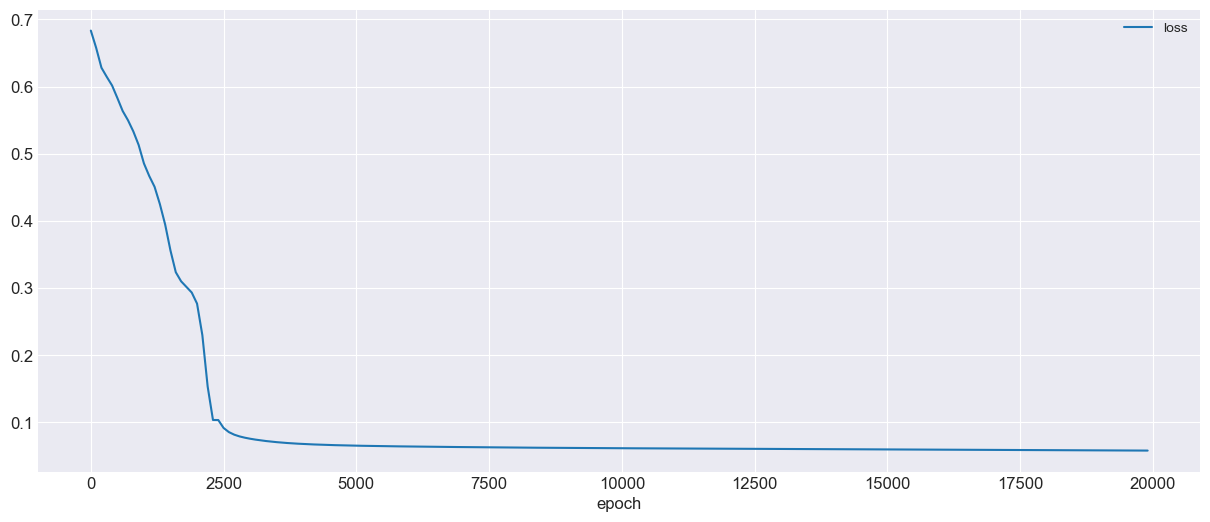

In [36]:
pd.DataFrame(loss_hist).plot(x='epoch', y='loss')

# training Data

In [38]:
y_pred = predict(model, X_train)

accuracy_score(y_pred=y_pred, y_true=np.argmax(y_train,axis=1))

0.97625

In [39]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_train.argmax(axis =1 ))
cm

array([[390,  10],
       [  9, 391]], dtype=int64)

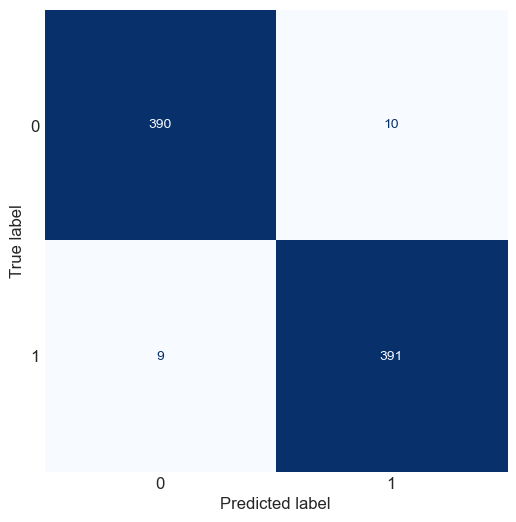

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

disp.plot(cmap='Blues', colorbar=False)
plt.grid()
plt.show()

0.975


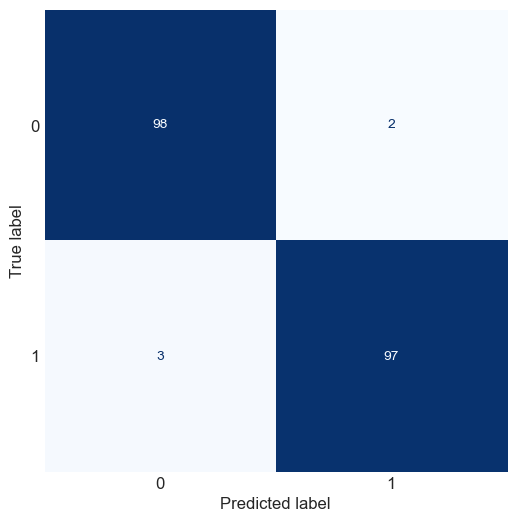

In [44]:
y_pred = predict(model, X_test)
#  calculate accuracy  
print(accuracy_score(y_pred=y_pred, y_true=y_test.argmax(axis =1 )))

# calculate confusion matrix
cm = confusion_matrix(y_pred=y_pred, y_true=y_test.argmax(axis =1 ))

#plots always look good
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues', colorbar=False)
plt.grid()
plt.show()

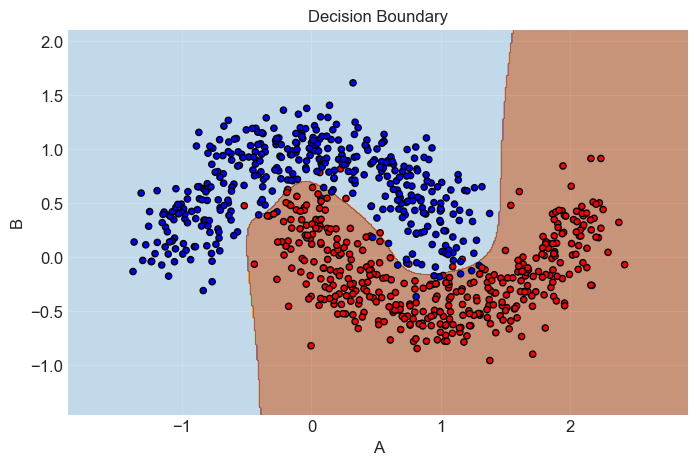

In [46]:
fn_plot_decision_boundary(lambda x:predict(model, x), X_train, y_train.argmax(axis =1 ))